# Exporting and plotting fitbit data

In [1]:
# This is a python file you need to have in the same directory as your code so you can import it
import gather_keys_oauth2 as Oauth2
import fitbit
import pandas as pd
import datetime
import os
from dotenv import load_dotenv, find_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your credentials
load_dotenv(find_dotenv())

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")

In [3]:
server=Oauth2.OAuth2Server(CLIENT_ID,
                           CLIENT_SECRET)
server.browser_authorize()
ACCESS_TOKEN=str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN=str(server.fitbit.client.session.token['refresh_token'])
auth2_client=fitbit.Fitbit(CLIENT_ID,
                           CLIENT_SECRET,
                           oauth2=True,
                           access_token=ACCESS_TOKEN,
                           refresh_token=REFRESH_TOKEN)

[14/Oct/2021:21:02:50] ENGINE Listening for SIGTERM.
[14/Oct/2021:21:02:50] ENGINE Listening for SIGHUP.
[14/Oct/2021:21:02:50] ENGINE Listening for SIGUSR1.
[14/Oct/2021:21:02:50] ENGINE Bus STARTING
CherryPy Checker:
The Application mounted at '' has an empty config.

[14/Oct/2021:21:02:50] ENGINE Started monitor thread 'Autoreloader'.
[14/Oct/2021:21:02:50] ENGINE Serving on http://127.0.0.1:8080
[14/Oct/2021:21:02:50] ENGINE Bus STARTED


127.0.0.1 - - [14/Oct/2021:21:02:52] "GET /?code=05cb819cd51b1b37b5c12c381dc78a66023117d1&state=OCg4xMnN2zYGiTGB8v2GfyunknZcbr HTTP/1.1" 200 122 "" "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15"


[14/Oct/2021:21:02:53] ENGINE Bus STOPPING
[14/Oct/2021:21:02:53] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[14/Oct/2021:21:02:53] ENGINE Stopped thread 'Autoreloader'.
[14/Oct/2021:21:02:53] ENGINE Bus STOPPED
[14/Oct/2021:21:02:53] ENGINE Bus EXITING
[14/Oct/2021:21:02:53] ENGINE Bus EXITED
[14/Oct/2021:21:02:53] ENGINE Waiting for child threads to terminate...


## Export data from API
#### Options:
__Activity__
- activities/calories
- activities/caloriesBMR
- activities/steps
- activities/distance
- activities/floors
- activities/elevation
- activities/minutesSedentary
- activities/minutesLightlyActive
- activities/minutesFairlyActive
- activities/minutesVeryActive
- activities/activityCalories </br>

__Tracker Activity__
- activities/tracker/calories
- activities/tracker/steps
- activities/tracker/distance
- activities/tracker/floors
- activities/tracker/elevation
- activities/tracker/minutesSedentary
- activities/tracker/minutesLightlyActive
- activities/tracker/minutesFairlyActive
- activities/tracker/minutesVeryActive
- activities/tracker/activityCalories

In [4]:
# This is the date of data that I want.
# You will need to modify for the date you want
# oneDate = pd.datetime(year = 2021, month = 1, day = 21)
oneDate = datetime.datetime.now().date() - datetime.timedelta(6)
oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1sec')

In [5]:
oneDate

datetime.date(2021, 10, 8)

In [6]:
df = pd.DataFrame(oneDayData["activities-heart-intraday"]["dataset"])
df = df.assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["time"]))

display(df.head()), df.shape

,time,value
0,2021-10-08 00:00:04,71
1,2021-10-08 00:00:09,72
2,2021-10-08 00:00:14,71
3,2021-10-08 00:00:19,70
4,2021-10-08 00:00:24,73


(None, (11138, 2))

## Today's heart rate data

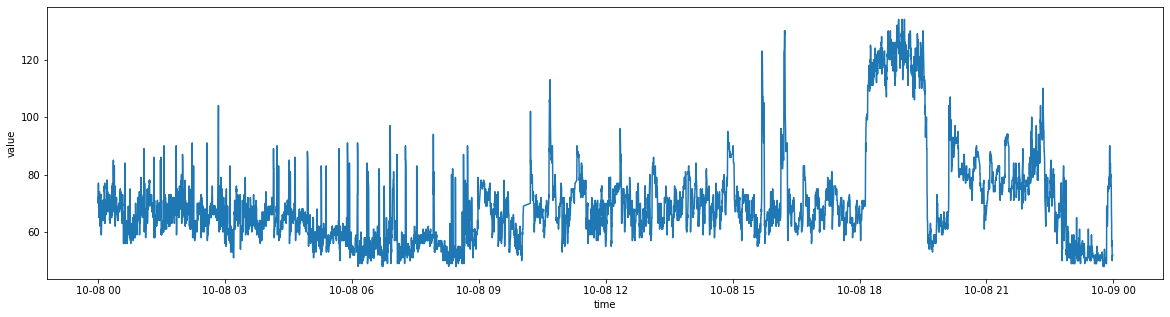

In [7]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="time",
                 y="value"
                 )

In [8]:
oneDayData = auth2_client.intraday_time_series('activities/steps', oneDate, detail_level='1min')

In [9]:
df = pd.DataFrame(oneDayData["activities-steps-intraday"]["dataset"])
df = df.assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["time"]))

display(df.head()), df.shape

,time,value
0,2021-10-08 00:00:00,0
1,2021-10-08 00:01:00,0
2,2021-10-08 00:02:00,0
3,2021-10-08 00:03:00,0
4,2021-10-08 00:04:00,0


(None, (1440, 2))

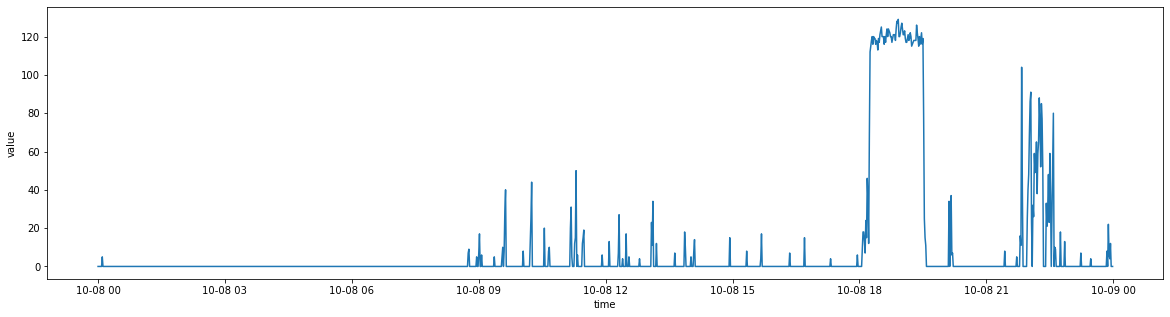

In [10]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="time",
                 y="value"
                 )

In [11]:
oneDayData = auth2_client.intraday_time_series('activities/distance', oneDate, detail_level='1min')

In [12]:
df = pd.DataFrame(oneDayData["activities-distance-intraday"]["dataset"])
df = (df.assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["time"]))
      .assign(value = lambda x: x["value"].cumsum())
     )

display(df.head()), df.shape

,time,value
0,2021-10-08 00:00:00,0.0
1,2021-10-08 00:01:00,0.0
2,2021-10-08 00:02:00,0.0
3,2021-10-08 00:03:00,0.0
4,2021-10-08 00:04:00,0.0


(None, (1440, 2))

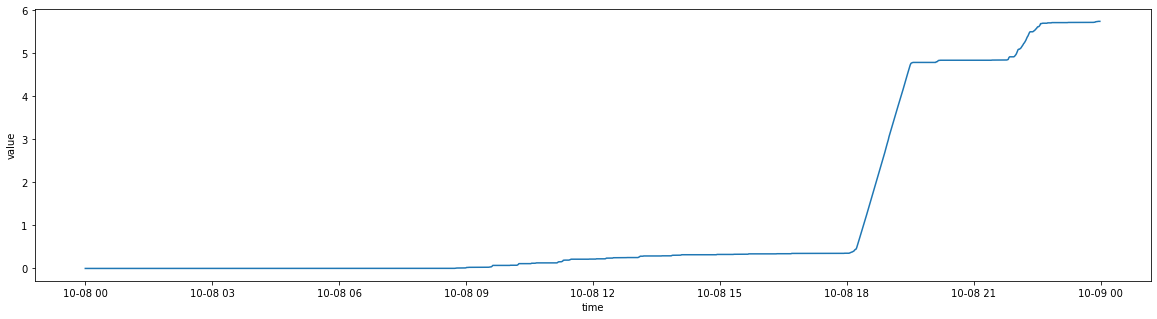

In [13]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="time",
                 y="value"
                 )

In [14]:
oneDayData = auth2_client.sleep(oneDate)

In [15]:
df = pd.DataFrame(oneDayData["sleep"][0]["minuteData"])
df = (df.assign(dateTime = lambda x: pd.to_datetime(str(f"{oneDate} ") + df["dateTime"]))
#       .assign(value = lambda x: x["value"].cumsum())
     )

display(df.head()), df.shape

,dateTime,value
0,2021-10-08 00:42:00,1
1,2021-10-08 00:43:00,1
2,2021-10-08 00:44:00,1
3,2021-10-08 00:45:00,1
4,2021-10-08 00:46:00,1


(None, (475, 2))

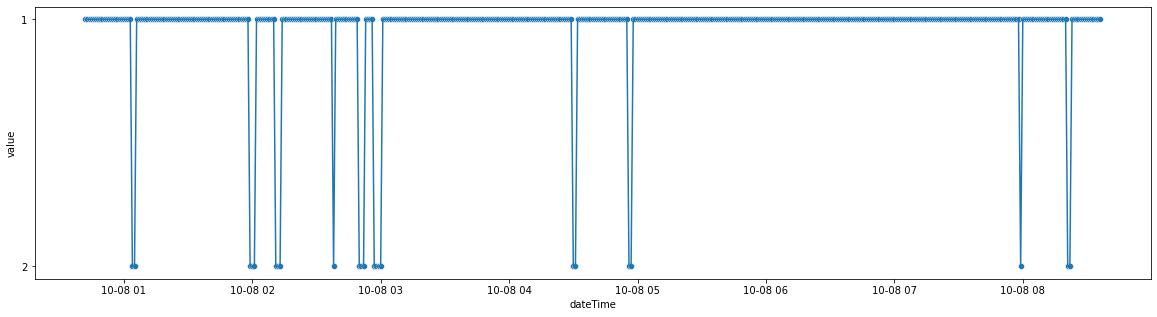

In [16]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df,
                 x="dateTime",
                 y="value"
                 )
_ = sns.scatterplot(data=df,
                 x="dateTime",
                 y="value"
                 )

In [17]:
str(datetime.datetime.now())

'2021-10-14 21:03:14.376295'

In [18]:
data_list = pd.date_range(start='1/1/2021', end=str(datetime.datetime.now())).astype(str).tolist()

In [19]:
data_list[-1]

'2021-10-14'

In [20]:
# auth2_client.activities()

In [21]:
# dir(fitbit.Fitbit)

In [28]:
monthDiffDate = datetime.datetime.now().date() - datetime.timedelta(32)

In [29]:
date_choice_list = pd.date_range(start=str(monthDiffDate), end=str(datetime.datetime.now())).astype(str).tolist()[:-2]

In [31]:
dfs_list = list()
day_number = 1
for oneDate in date_choice_list:
    oneDayData = auth2_client.intraday_time_series('activities/heart', oneDate, detail_level='1min')
    df = pd.DataFrame(oneDayData["activities-heart-intraday"]["dataset"])
    df = (df
          .assign(time = lambda x: pd.to_datetime(str(f"{oneDate} ") + x["time"]))
          .rename(columns={"value": f"day_number_{day_number}_value"})
           .assign(hour=lambda d: d["time"].dt.hour)
         .assign(minute=lambda d: d["time"].dt.minute)
         .drop("time", axis=1)
          .set_index(["hour", "minute"])
         )
    dfs_list.append(df)
    day_number += 1

In [32]:
oneDate

'2021-10-12'

In [33]:
tmp_df = pd.concat(dfs_list, axis=1)

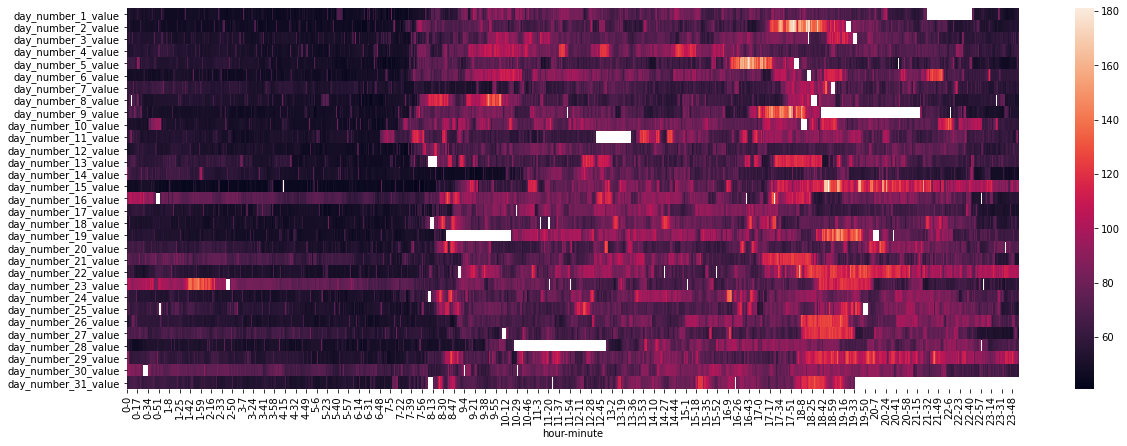

In [34]:
_ = plt.figure(figsize=(20, 7))
_ = sns.heatmap(tmp_df.T)

In [35]:
tmp_df.index = [str(x).replace(", ", "-").replace("(", "").replace(")", "") for x in tmp_df.index.values]

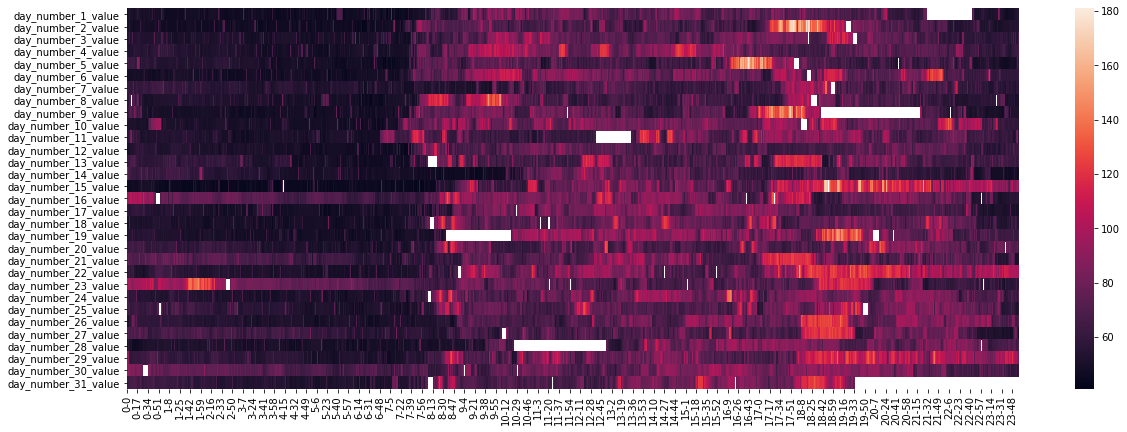

In [36]:
_ = plt.figure(figsize=(20, 7))
_ = sns.heatmap(tmp_df.T)

In [39]:
_ = tmp_df.to_csv(f"data/{oneDate}_heart_min.csv")

In [52]:
import glob

csv_list = glob.glob("data/*")

[x for x in csv_list if oneDate in x][0]

if len([x for x in csv_list if oneDate in x]) > 0:
    tmp_df = pd.read_csv([x for x in csv_list if oneDate in x][0], index_col=0)

In [55]:
str(datetime.datetime.now().date() - datetime.timedelta(2))

'2021-10-12'

In [59]:
tmp_df.index

Index(['0-0', '0-1', '0-2', '0-3', '0-4', '0-5', '0-6', '0-7', '0-8', '0-9',
       ...
       '23-50', '23-51', '23-52', '23-53', '23-54', '23-55', '23-56', '23-57',
       '23-58', '23-59'],
      dtype='object', length=1440)

In [65]:
tmp_df.set_index(tmp_df.index.str.split("-", expand=True))

day_number_1_value  day_number_2_value  day_number_3_value  \
0  0                 52.0                51.0                55.0   
   1                 56.0                52.0                56.0   
   2                 49.0                52.0                54.0   
   3                 51.0                50.0                55.0   
   4                 56.0                50.0                54.0   
...                   ...                 ...                 ...   
23 55                62.0                54.0                57.0   
   56                52.0                55.0                56.0   
   57                56.0                54.0                55.0   
   58                52.0                55.0                55.0   
   59                55.0                55.0                70.0   

       day_number_4_value  day_number_5_value  day_number_6_value  \
0  0                 67.0                65.0                48.0   
   1                 54.0                65.0                49.0   
   2                 57.0                63.0                49.0   
   3                 53.0                65.0                49.0   
   4                 52.0                62.0                49.0   
...                   ...                 ...                 ...   
23 55                62.0                50.0                60.0   
   56                63.0                54.0                60.0   
   57                65.0                70.0                60.0   
   58                65.0                63.0                59.0   
   59                65.0                60.0                61.0   

       day_number_7_value  day_number_8_value  day_number_9_value  \
0  0                 60.0                56.0                49.0   
   1                 61.0                58.0                50.0   
   2                 62.0                58.0                57.0   
   3                 62.0                57.0                62.0   
   4                 60.0                61.0                65.0   
...                   ...                 ...                 ...   
23 55                56.0                50.0                53.0   
   56                57.0                50.0                53.0   
   57                58.0                51.0                53.0   
   58                58.0                50.0                52.0   
   59                57.0                50.0                52.0   

       day_number_10_value  ...  day_number_22_value  day_number_23_value  \
0  0                  53.0  ...                 52.0                106.0   
   1                  52.0  ...                 61.0                 99.0   
   2                  53.0  ...                 57.0                102.0   
   3                  52.0  ...                 60.0                101.0   
   4                  52.0  ...                 63.0                100.0   
...                    ...  ...                  ...                  ...   
23 55                 60.0  ...                107.0                 58.0   
   56                 59.0  ...                101.0                 65.0   
   57                 58.0  ...                101.0                 57.0   
   58                 57.0  ...                101.0                 58.0   
   59                 57.0  ...                101.0                 58.0   

       day_number_24_value  day_number_25_value  day_number_26_value  \
0  0                  59.0                 63.0                 60.0   
   1                  59.0                 63.0                 54.0   
   2                  63.0                 66.0                 54.0   
   3                  66.0                 66.0                 53.0   
   4                  62.0                 65.0                 58.0   
...                    ...                  ...                  ...   
23 55                 64.0                 53.0                 68.0   
   56              